# Lesson 1: Multi-Agent Conversation and Stand-up Comedy

Welcome to Lesson 1.

To access the `requirements.txt` file and the`utils` modules, please go to the `File` menu and select`Open...`.

I hope you enjoy this course!

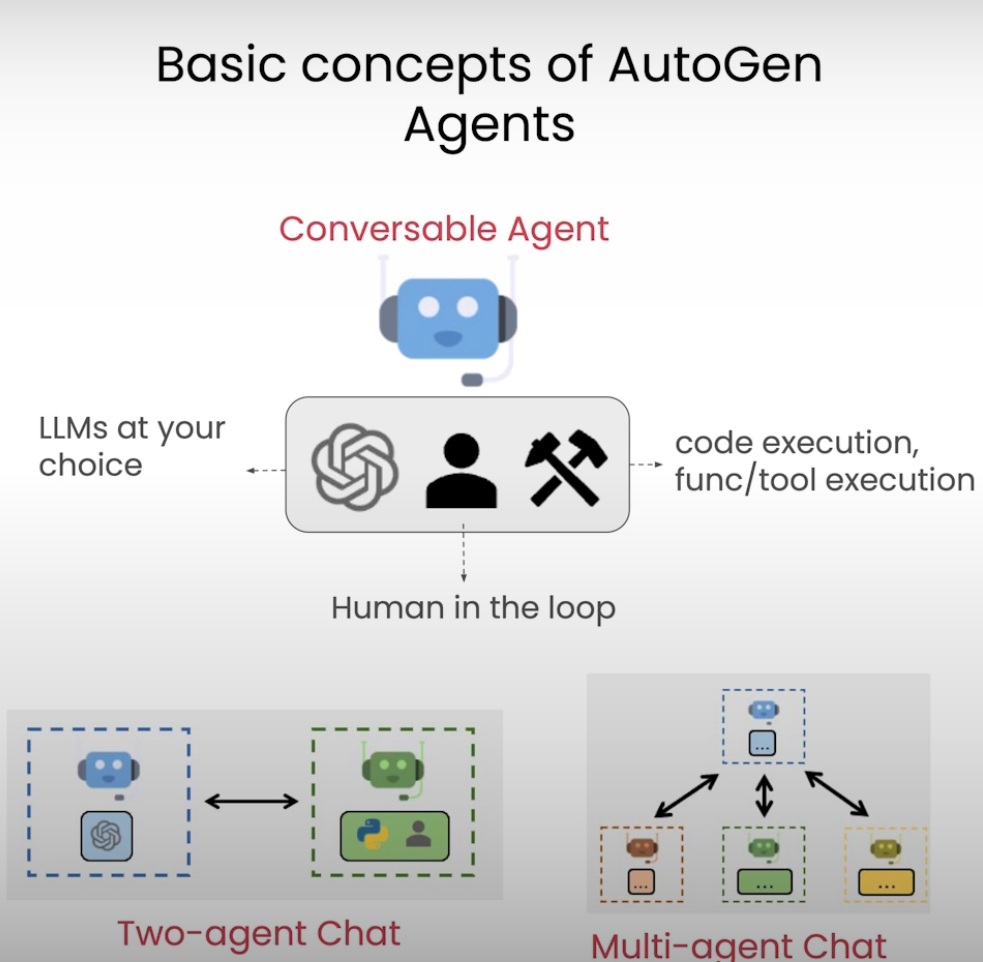

## Setup

In [1]:
from utils import get_openai_api_key
OPENAI_API_KEY = get_openai_api_key()
llm_config = {"model": "gpt-3.5-turbo"}

## Define an AutoGen agent

In [ ]:
from autogen import ConversableAgent

agent = ConversableAgent(
    name="chatbot",
    llm_config=llm_config,
    human_input_mode="NEVER",# 这个参数意味着agent不会寻求认为输入
)

In [ ]:
reply = agent.generate_reply(
    messages=[{"content": "Tell me a joke.", "role": "user"}]
)
print(reply)

In [ ]:
reply = agent.generate_reply(
    messages=[{"content": "Repeat the joke.", "role": "user"}]
)
print(reply)

## Conversation

Setting up a conversation between two agents, Cathy and Joe, where the memory of their interactions is retained.

In [ ]:
cathy = ConversableAgent(
    name="cathy",
    system_message=
    "Your name is Cathy and you are a stand-up comedian.",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

joe = ConversableAgent(
    name="joe",
    system_message=
    "Your name is Joe and you are a stand-up comedian. "
    "Start the next joke from the punchline of the previous joke.",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

**Note**: You might get a slightly different response (set of jokes) than what is shown in the video

In [ ]:
chat_result = joe.initiate_chat(
    recipient=cathy, 
    message="I'm Joe. Cathy, let's keep the jokes rolling.",
    max_turns=2,
)

## Print some results

You can print out:

1. Chat history
2. Cost
3. Summary of the conversation

In [ ]:
import pprint

pprint.pprint(chat_result.chat_history)

In [ ]:
pprint.pprint(chat_result.cost)

In [ ]:
pprint.pprint(chat_result.summary)

## Get a better summary of the conversation

In [ ]:
chat_result = joe.initiate_chat(
    cathy, 
    message="I'm Joe. Cathy, let's keep the jokes rolling.", 
    max_turns=2, 
    summary_method="reflection_with_llm",
    summary_prompt="Summarize the conversation",
)

In [ ]:
pprint.pprint(chat_result.summary)

## Chat Termination

Chat can be terminated using a termination conditions.

In [ ]:
cathy = ConversableAgent(
    name="cathy",
    system_message=
    "Your name is Cathy and you are a stand-up comedian. "
    "When you're ready to end the conversation, say 'I gotta go'.",
    llm_config=llm_config,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"],
)

joe = ConversableAgent(
    name="joe",
    system_message=
    "Your name is Joe and you are a stand-up comedian. "
    "When you're ready to end the conversation, say 'I gotta go'.",
    llm_config=llm_config,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"] or "Goodbye" in msg["content"],
)

In [ ]:
chat_result = joe.initiate_chat(
    recipient=cathy,
    message="I'm Joe. Cathy, let's keep the jokes rolling."
)

In [ ]:
cathy.send(message="What's last joke we talked about?", recipient=joe)